# Text-prompted zero-shot object detection by hand

# Imports

In [32]:
!pip install -q "transformers[torch]" pillow

## Zero-shot image classification pipeline

In [33]:
from transformers import pipeline

checkpoint = "openai/clip-vit-base-patch32"
detector = pipeline(
    model=checkpoint,
    task="zero-shot-image-classification"
)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

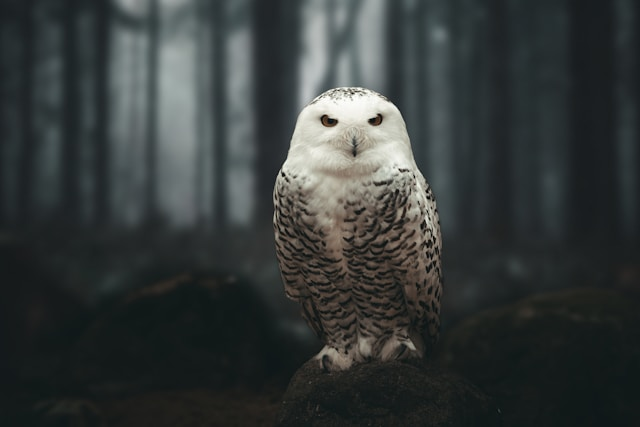

In [40]:
# Let’s take an image
from PIL import Image
import requests
from urllib import request

url = "https://unsplash.com/photos/g8oS8-82DxI/download?ixid=MnwxMjA3fDB8MXx8SnBnNktpZGwtSGt8fHx8fDJ8fDE2NzgxMDYwODc&force=true&w=640"
image = Image.open(request.urlopen(url))
image

In [41]:
predictions = detector(image, candidate_labels=["fox", "bear", "seagull", "owl"])
predictions

[{'score': 0.9991915822029114, 'label': 'owl'},
 {'score': 0.0004121289821341634, 'label': 'seagull'},
 {'score': 0.0002494459040462971, 'label': 'bear'},
 {'score': 0.00014685328642372042, 'label': 'fox'}]

## Zero-shot image classification by hand

In [43]:
# load the model and associated processor
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

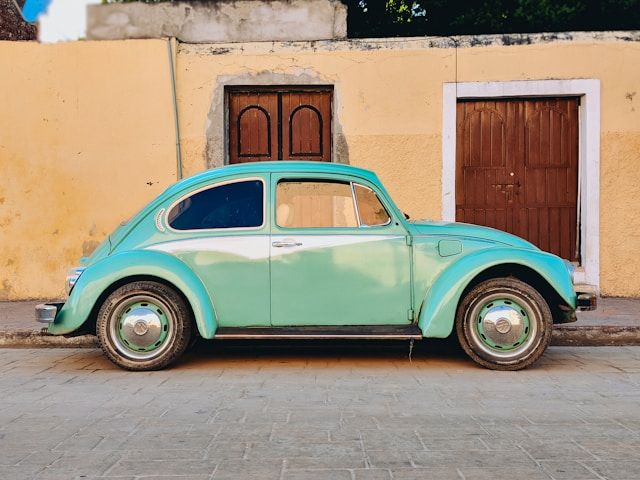

In [46]:
# Let’s take a different image
from PIL import Image
import requests
from urllib import request

url = "https://unsplash.com/photos/xBRQfR2bqNI/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjc4Mzg4ODEx&force=true&w=640"
image = Image.open(request.urlopen(url))

image

In [48]:
# Use the processor to prepare the inputs for the model
candidate_labels = ["tree", "car", "bike", "cat"]
candidate_labels = [f'This is a photo of {label}.' for label in candidate_labels]
inputs = processor(images=image, text=candidate_labels, return_tensors="pt", padding=True)

In [49]:
# Pass the inputs through the model, post-process, and visualize the results
import torch

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()
scores = probs.tolist()

result = [
    {"score": score, "label": candidate_label}
    for score, candidate_label in sorted(zip(probs, candidate_labels), key=lambda x: -x[0])
]

result

[{'score': 0.993764, 'label': 'This is a photo of car.'},
 {'score': 0.0052475114, 'label': 'This is a photo of bike.'},
 {'score': 0.0006119813, 'label': 'This is a photo of tree.'},
 {'score': 0.00037650682, 'label': 'This is a photo of cat.'}]